### ИУ5-61Б Павловская А.А. Лаб3 ТМО

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import *
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [1]:
#data = pd.read_csv('archive/heart.csv')
#def make_dataframe(ds_function):
    #ds = ds_function()
    #df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     #columns= list(ds['feature_names']) + ['target'])
    #return df

#data = make_dataframe(load_iris)

In [2]:
wine = load_wine()

### Разделение выборки на обучающую и тестовую

In [3]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine.data, wine.target, test_size=0.5, random_state=1)

In [95]:
# Размер обучающей выборки
wine_X_train.shape, wine_y_train.shape

((89, 13), (89,))

In [96]:
# Размер тестовой выборки
wine_X_test.shape, wine_y_test.shape

((89, 13), (89,))

In [97]:
np.unique(wine_y_train)

array([0, 1, 2])

In [98]:
np.unique(wine_y_test)

array([0, 1, 2])

###  Обучение модели k ближайших соседей 

In [8]:
# 2 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(wine_X_train, wine_y_train)
target1_1 = cl1_1.predict(wine_X_test)
len(target1_1), target1_1

(89,
 array([0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        1]))

In [9]:
# 10 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(wine_X_train, wine_y_train)
target1_2 = cl1_2.predict(wine_X_test)
len(target1_2), target1_2

(89,
 array([1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2,
        0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0,
        1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0,
        1]))

### Метрики качества регрессии

#### 1) Accuracy

In [10]:
# 2 ближайших соседа
accuracy_score(wine_y_test, target1_1)

0.6404494382022472

In [11]:
# 10 ближайших соседей
accuracy_score(wine_y_test, target1_2)

0.6629213483146067

In [111]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [112]:
# Если целевой признак ==2, 
# то будем считать этот случай 1 в бинарном признаке
bin_wine_y_train = convert_target_to_binary(wine_y_train, 2)
list(zip(wine_y_train, bin_wine_y_train))[:10]

[(1, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (2, 1),
 (1, 0),
 (1, 0),
 (1, 0)]

In [113]:
bin_wine_y_test = convert_target_to_binary(wine_y_test, 2)
list(zip(wine_y_test, bin_wine_y_test))[:10]

[(2, 1),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (2, 1),
 (1, 0),
 (0, 0),
 (2, 1),
 (1, 0)]

In [114]:
# Конвертация предсказанных признаков
bin_target1_1 = convert_target_to_binary(target1_1, 2)
bin_target1_2 = convert_target_to_binary(target1_2, 2)

In [115]:
balanced_accuracy_score(bin_wine_y_test, bin_target1_1)

0.5156037991858887

In [116]:
balanced_accuracy_score(bin_wine_y_test, bin_target1_2)

0.5390094979647219

#### 2) Матрица ошибок или Confusion Matrix

In [117]:
confusion_matrix(bin_wine_y_test, bin_target1_1, labels=[0, 1])

array([[63,  4],
       [20,  2]], dtype=int64)

In [118]:
tn, fp, fn, tp = confusion_matrix(bin_wine_y_test, bin_target1_1).ravel()
tn, fp, fn, tp

(63, 4, 20, 2)

In [120]:
# Пример для небинарной классификации
confusion_matrix(wine_y_test, target1_1, labels=[0, 1, 2])

array([[26,  5,  2],
       [ 3, 29,  2],
       [ 4, 16,  2]], dtype=int64)

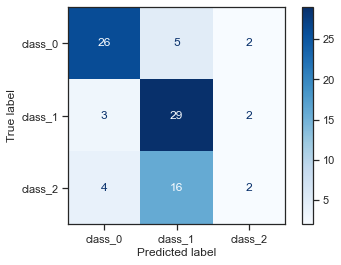

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cl1_1, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, cmap=plt.cm.Blues)

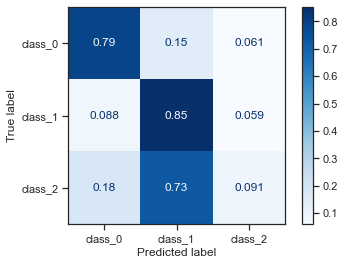

In [13]:
plot_confusion_matrix(cl1_1, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, 
                      cmap=plt.cm.Blues, normalize='true')

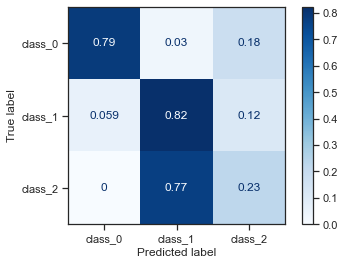

In [14]:
plot_confusion_matrix(cl1_2, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, 
                      cmap=plt.cm.Blues, normalize='true')

#### 3) Precision, recall и F-мера

In [128]:
# Для 2 ближайших соседей
precision_score(bin_wine_y_test, bin_target1_1), recall_score(bin_wine_y_test, bin_target1_1)

(0.3333333333333333, 0.09090909090909091)

In [129]:
# Для 10 ближайших соседей
precision_score(bin_wine_y_test, bin_target1_2), recall_score(bin_wine_y_test, bin_target1_2)

(0.3333333333333333, 0.22727272727272727)

In [131]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(wine_y_test, target1_1, average='micro')

0.6404494382022472

In [132]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(wine_y_test, target1_1, average='macro')

0.567070707070707

In [133]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется средневзвешенное значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(wine_y_test, target1_1, average='weighted')

0.5961048689138577

F-мера

In [134]:
f1_score(bin_wine_y_test, bin_target1_2)

0.27027027027027023

In [135]:
f1_score(wine_y_test, target1_1, average='micro')

0.6404494382022472

In [136]:
f1_score(wine_y_test, target1_1, average='macro')

0.5404040404040403

In [137]:
f1_score(wine_y_test, target1_1, average='weighted')

0.5912252541466024

In [138]:
# Значения точности, полноты и F-меры для всех классов выборки
classification_report(wine_y_test, target1_1, 
                      target_names=wine.target_names, output_dict=True)

{'class_0': {'precision': 0.7878787878787878,
  'recall': 0.7878787878787878,
  'f1-score': 0.7878787878787878,
  'support': 33},
 'class_1': {'precision': 0.58,
  'recall': 0.8529411764705882,
  'f1-score': 0.6904761904761905,
  'support': 34},
 'class_2': {'precision': 0.3333333333333333,
  'recall': 0.09090909090909091,
  'f1-score': 0.14285714285714288,
  'support': 22},
 'accuracy': 0.6404494382022472,
 'macro avg': {'precision': 0.567070707070707,
  'recall': 0.5772430184194889,
  'f1-score': 0.5404040404040403,
  'support': 89},
 'weighted avg': {'precision': 0.5961048689138577,
  'recall': 0.6404494382022472,
  'f1-score': 0.5912252541466024,
  'support': 89}}

#### 4) ROC-кривая и ROC AUC

In [139]:
# Обучим модели на задаче бинарной классифкации, 
# чтобы получить вероятности классов

# 2 ближайших соседа
bin_cl1_1 = KNeighborsClassifier(n_neighbors=2)
bin_cl1_1.fit(wine_X_train, bin_wine_y_train)
# предскажем метки классов
bin_cl1_1.predict(wine_X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [140]:
# Классы возвращаются в следующем порядке
bin_cl1_1.classes_

array([0, 1])

In [141]:
# предскажем вероятности классов
proba_target1_1 = bin_cl1_1.predict_proba(wine_X_test)
len(proba_target1_1), proba_target1_1

(89,
 array([[1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [0.5, 0.5],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0

In [142]:
# вероятность единичного (истинного) класса
true_proba_target1_1 = proba_target1_1[:,1]
true_proba_target1_1

array([0. , 0. , 1. , 0. , 0. , 0. , 1. , 0. , 0.5, 0. , 0. , 0.5, 0. ,
       0. , 1. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0.5,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0. ,
       0. , 0. , 0.5, 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5,
       0.5, 0. , 0.5, 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 1. ,
       0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0.5, 0.5, 0. , 0. , 1. , 1. ,
       0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. ])

In [144]:
fpr, tpr, thresholds = roc_curve(bin_wine_y_test, true_proba_target1_1, 
                                 pos_label=1)
fpr, tpr, thresholds

(array([0.        , 0.05970149, 0.23880597, 1.        ]),
 array([0.        , 0.09090909, 0.63636364, 1.        ]),
 array([2. , 1. , 0.5, 0. ]))

In [145]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

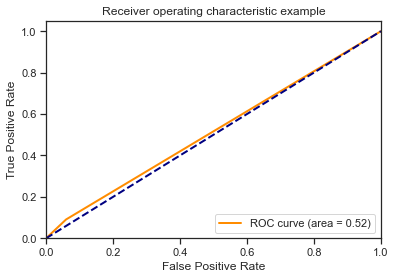

In [146]:
# Для 2 ближайших соседей
draw_roc_curve(bin_wine_y_test, bin_target1_1, pos_label=1, average='micro')

In [148]:
# Для 10 ближайших соседей
bin_cl1_2 = KNeighborsClassifier(n_neighbors=10)
bin_cl1_2.fit(wine_X_train, bin_wine_y_train)
proba_target2_1 = bin_cl1_2.predict_proba(wine_X_test)
true_proba_target2_1 = proba_target2_1[:,1]
roc_curve_k10_res = roc_curve(bin_wine_y_test, true_proba_target2_1, pos_label=1)
roc_curve_k10_res

(array([0.        , 0.01492537, 0.04477612, 0.19402985, 0.32835821,
        0.35820896, 0.41791045, 0.56716418, 1.        ]),
 array([0.        , 0.09090909, 0.18181818, 0.5       , 0.77272727,
        0.90909091, 0.90909091, 1.        , 1.        ]),
 array([1.7, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))

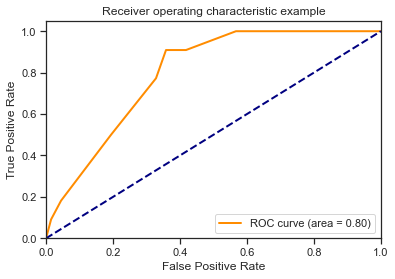

In [149]:
draw_roc_curve(bin_wine_y_test, true_proba_target2_1, pos_label=1, average='micro')

### Подбор гиперпараметра K с использованием GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV

In [152]:
n_range = np.array(range(5, 55, 5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [156]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(wine_X_train, wine_y_train)

Wall time: 100 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [157]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00020146, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.0031333 , 0.        , 0.        ]),
 'std_fit_time': array([0.00040293, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00626659, 0.        , 0.        ]),
 'mean_score_time': array([0.        , 0.00312614, 0.        , 0.00312381, 0.00313234,
        0.00110168, 0.        , 0.        , 0.        , 0.0031251 ]),
 'std_score_time': array([0.        , 0.00625229, 0.        , 0.00624762, 0.00626469,
        0.00220337, 0.        , 0.        , 0.        , 0.00625019]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neig

In [158]:
#Лучшая модель:
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=15)

In [159]:
#Лучшее значение параметров:
clf_gs.best_params_

{'n_neighbors': 15}

In [160]:
#Лучшее значение метрики:
clf_gs.best_score_

0.7189542483660132

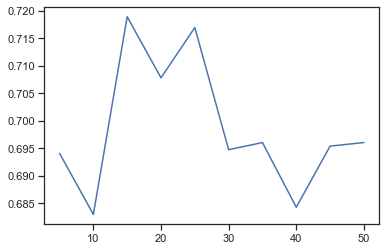

In [162]:
# Изменение качества на тестовой выборке в зависимости K соседей: 
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

### Подбор гиперпараметра K с использованием кросс-валидации и решетчатого поиска

In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge
from sklearn.svm import SVC

In [17]:
# Формирование обучающей и тестовой выборки
wine = load_wine()
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine.data, wine.target, test_size=0.5, random_state=1)

In [18]:
# Первичное обучение модели и оценка качества
cl1_1 = KNeighborsClassifier(n_neighbors=50)
cl1_1.fit(wine_X_train, wine_y_train)
target1_0 = cl1_1.predict(wine_X_train)
target1_1 = cl1_1.predict(wine_X_test)
accuracy_score(wine_y_train, target1_0), accuracy_score(wine_y_test, target1_1)

(0.6741573033707865, 0.7191011235955056)

In [19]:
#Оценка качества модели с использованием кросс-валидации
scores = cross_val_score(KNeighborsClassifier(n_neighbors=50), 
                         wine.data, wine.target, 
                         cv=LeaveOneOut())
scores, np.mean(scores)

(array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
        1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 0., 1.]),
 0.7078651685393258)

In [20]:
#Подбор гиперпараметров на основе решетчатого поиска и кросс-валидации
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [21]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=LeaveOneOut(), scoring='accuracy')
clf_gs.fit(wine.data, wine.target)

Wall time: 2.49 s


GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [22]:
clf_gs.best_params_

{'n_neighbors': 25}

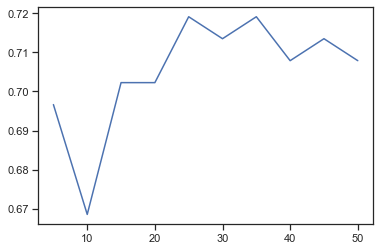

In [23]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [24]:
#Обучение модели и оценка качества с учетом подобранных гиперпараметров
clf_gs.best_estimator_.fit(wine_X_train, wine_y_train)
target2_0 = clf_gs.best_estimator_.predict(wine_X_train)
target2_1 = clf_gs.best_estimator_.predict(wine_X_test)

In [25]:
# Новое качество модели
accuracy_score(wine_y_train, target2_0), accuracy_score(wine_y_test, target2_1)

(0.7078651685393258, 0.7303370786516854)

In [26]:
# Качество модели до подбора гиперпараметров
accuracy_score(wine_y_train, target1_0), accuracy_score(wine_y_test, target1_1)

(0.6741573033707865, 0.7191011235955056)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

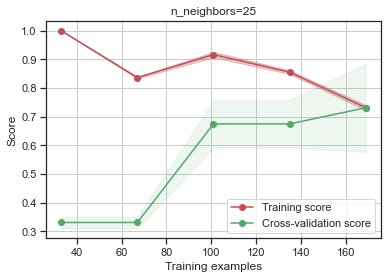

In [31]:
# Построение кривых обучения и валидации
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=25', 
                    wine.data, wine.target, cv=20, train_sizes=np.linspace(.2, 1.0, 5))

In [32]:
n_range2 = np.array(range(5,125,5))

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

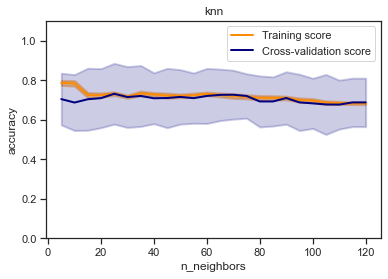

In [33]:
plot_validation_curve(clf_gs.best_estimator_, 'knn', 
                      wine.data, wine.target, 
                      param_name='n_neighbors', param_range=n_range2, 
                      cv=20, scoring="accuracy")

### Построение кривой обучения

In [27]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.3, color="r")
    plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes,train_scores_mean, 'o-', color="r",
            label="Training score")
    plt.plot(train_sizes,test_scores_mean, 'o-', color="g",
            label="Cross-validation score")
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

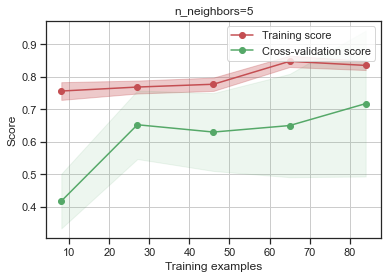

In [176]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5),'n_neighbors=5',
                   wine_X_train, wine_y_train, cv=20)

### Построение кривой валидации

In [28]:
def plot_validation_curve(estimator, title, X, y,
                         param_name, param_range, cv, scoring="accuracy"):
    train_scores, test_scores = validation_curve(estimator, X, y,
                         param_name=param_name, param_range=param_range, cv=cv, 
                                                 scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range,train_scores_mean, label= "Training score", color="darkorange",
            lw=lw)
    plt.fill_between(param_range,train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.4, color="darkorange",
            lw=lw)
    plt.plot(param_range,test_scores_mean, label= "Cross-validation score", color="navy",
            lw=lw)
    plt.fill_between(param_range,test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.2, color="navy",
            lw=lw)
    plt.legend(loc="best")
    return plt    

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

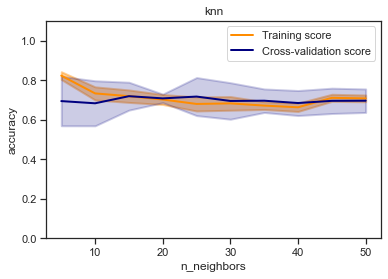

In [183]:
plot_validation_curve(KNeighborsClassifier(), 'knn',
                     wine_X_train,wine_y_train,
                     param_name='n_neighbors', param_range = n_range,
                     cv=5, scoring = "accuracy")